In [1]:
import twint
import nest_asyncio
import pandas as pd

def convert_to_df(tweets_json_file, cols = ["date", "username", "tweet", "replies_count", "retweets_count", "likes_count"]):
    
    

  # Read the file as pandas dataframe
  pandas_df = pd.read_json(tweets_json_file, lines = True)

  #Only get specific columns
  pandas_df = pandas_df[cols]

  return pandas_df

import textwrap

def show_random_tweets(df, N=3):

  if(N > len(df)):
    N = 3

  for i in range(N):
    row = df.iloc[i]
    print("Username: {}".format(row["username"]))
    print("Tweet: {}".format("\n".join(textwrap.wrap(row["tweet"], 
                                                     width=50))))
    print("\n")
    
# Useful Libraries
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as np
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Implementation of the function
def show_word_cloud(df, img_mask_path, fig_size=(20, 7)):

  # Create the color mask
  img_color_mask = np.array(Image.open(img_mask_path))
  
  # Get all the text 
  text = df.tweet.tolist() 

  # join the list and lowercase all the words
  text = ' '.join(text).lower()

  #create the wordcloud object by 
  """
  - removing stopwords
  - changing the background color to white
  - using the image as final mask
  """
  wordcloud = WordCloud(stopwords = STOPWORDS, 
                        background_color='white',
                        mask = img_color_mask).generate(text)

  # Configure for a bigger image size
  plt.figure(figsize = fig_size)
  plt.axis('off')
  plt.imshow(wordcloud)

In [29]:
others_tweet_df = convert_to_df("Others_Gas_Prices2.json")
others_tweet_df


,date,username,tweet,replies_count,retweets_count,likes_count
0,2020-07-02,iampulkitrai,@Cannadrix_CND Good project @RanyAsih27 @Ge...,1,0,2
1,2020-07-02,effortcapital,@Crypt0_kenny $ETH 2.0 has the potential to do...,2,1,38
2,2020-07-02,coldhandscrypto,Wow... that was rather quick! Now #Cardano is ...,0,1,7
3,2020-07-02,ziggymurphy69,@Crypt0_kenny $ETH 2.0 is $VET 1.0 https://t....,1,1,7
4,2020-07-02,durham3dprint,@rapcando +1 for mention of Binance. If you ha...,0,0,0
...,...,...,...,...,...,...
1629,2020-07-01,crypt0_kenny,@neftali95687675 The dominance.. this is not $BTC,0,0,1
1630,2020-07-01,colinrobinson__,@binance @Chromia $chr trading comp is live. ...,1,2,4
1631,2020-07-01,mateusmazza8,@QuintenFrancois $LINK $ETH $UBT $EWT $BTC,0,0,2
1632,2020-07-01,2ndoldest,"@MeanHash My kids are 13 (twins), and they kno...",0,0,0


In [30]:
# Show random tweets
show_random_tweets(others_tweet_df)

Username: iampulkitrai
Tweet: @Cannadrix_CND Good project   @RanyAsih27
@Getrudis11  @Tfb213  @Jakir134  @kaibuioktav
#cryptocurrency #Blockchain #Bitcoin #Airdrop


Username: effortcapital
Tweet: @Crypt0_kenny $ETH 2.0 has the potential to do
more TPS, even with SURFACE I believe. The problem
is the timeline for full 2.0.  I see future $ETH
as today’s Apple App Store, and $VET as the
equivalent of today’s SAP, Oracle, Salesforce,
etc.   Two different paths. Both extremely
valuable.


Username: coldhandscrypto
Tweet: Wow... that was rather quick! Now #Cardano is the
6th largest #cryptocurrency in the world. It will
take $ETH #Ethereum's place sooner or later.
Better be ready for it!  https://t.co/lY80KRIAlc




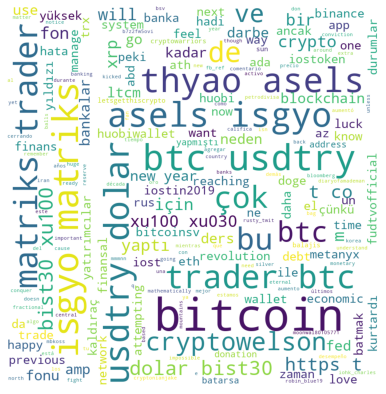

In [72]:
# Apply it to President Joe Biden Image and Tweets
bide_img_path = "joeBiden.png"
show_word_cloud(others_tweet_df, bide_img_path)

In [5]:
import time
from datetime import date, timedelta

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2021, 11, 8)
end_date = date(2022, 7, 1)
for single_date in daterange(start_date, end_date):
    print(single_date.strftime("%Y-%m-%d")+" 00:00:00",(single_date+timedelta(1)).strftime("%Y-%m-%d")+" 00:00:00")
    # To avoid the event loop is already running in python error message.
    nest_asyncio.apply()

    # Configure
    conf = twint.Config()
    conf.Lang = "en"
    conf.Limit = None
    conf.Hide_output = True

    #Get tweets published after March 1st, 2022
    conf.Since = single_date.strftime("%Y-%m-%d")+" 00:00:00"
    conf.Until=(single_date+timedelta(1)).strftime("%Y-%m-%d")+" 00:00:00"
    #conf.Verified = True
    conf.Show_hashtags=True
    conf.Favorites=True
    conf.Replies=True
    conf.Retweets=False
    #conf.Stats = True
    #conf.User_full = True
    conf.Popular_tweets = True
    #conf.Filter_retweets = True

    #conf.Min_likes = 20
    #conf.Min_retweets = 20
    #conf.Min_replies

    # Search Criteria
    #conf.Search = "(#btc OR #ada OR #eth OR #bitcoin OR #Crypto OR #Cryptocurrency OR #UNI OR #SOL OR #APE OR #Mana)"
    conf.Search = "($BTC OR $ADA OR $ETH OR $bitcoin OR $Crypto OR $Cryptocurrency)"
    #conf.Search = '#BTC','#ADA','#Crypto'

    conf.Output = "twitterData/twitterData_"+single_date.strftime("%Y%m%d")+".json"

    conf.Store_json = True




    # Run
    twint.run.Search(conf)
    time.sleep(60)

2021-11-08 00:00:00 2021-11-09 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2021-11-09 00:00:00 2021-11-10 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2021-11-10 00:00:00 2021-11-11 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2021-11-11 00:00:00 2021-11-12 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2021-11-12 00:00:00 2021-11-13 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2021-11-13 00:00:00 2021-11-14 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2021-11-14 00:00:00 2021-11-15 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2021-11-15 00:00:00 2021-11-16 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2021-11-16 00:00:00 2021-11-17 0

2022-01-15 00:00:00 2022-01-16 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-01-16 00:00:00 2022-01-17 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-01-17 00:00:00 2022-01-18 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-01-18 00:00:00 2022-01-19 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-01-19 00:00:00 2022-01-20 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-01-20 00:00:00 2022-01-21 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-01-21 00:00:00 2022-01-22 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-01-22 00:00:00 2022-01-23 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-01-23 00:00:00 2022-01-24 0

2022-03-24 00:00:00 2022-03-25 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-03-25 00:00:00 2022-03-26 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-03-26 00:00:00 2022-03-27 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-03-27 00:00:00 2022-03-28 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-03-28 00:00:00 2022-03-29 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-03-29 00:00:00 2022-03-30 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-03-30 00:00:00 2022-03-31 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-03-31 00:00:00 2022-04-01 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-04-01 00:00:00 2022-04-02 0

2022-05-31 00:00:00 2022-06-01 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-06-01 00:00:00 2022-06-02 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-06-02 00:00:00 2022-06-03 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-06-03 00:00:00 2022-06-04 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-06-04 00:00:00 2022-06-05 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-06-05 00:00:00 2022-06-06 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-06-06 00:00:00 2022-06-07 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-06-07 00:00:00 2022-06-08 00:00:00
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2022-06-08 00:00:00 2022-06-09 0

In [62]:
twint.__file__

'c:\\users\\ricky\\src\\twint\\twint\\__init__.py'

In [63]:
 nest_asyncio.__file__

'C:\\Users\\ricky\\Anaconda3\\lib\\site-packages\\nest_asyncio.py'